<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning2020/blob/main/plot_digits_classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


Simple visualization and classification of the digits dataset
=============================================================

Plot the first few samples of the digits dataset and a 2D representation
built using PCA, then do a simple classification



In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

Plot the data: images of digits
-------------------------------

Each event is an 8x8 image



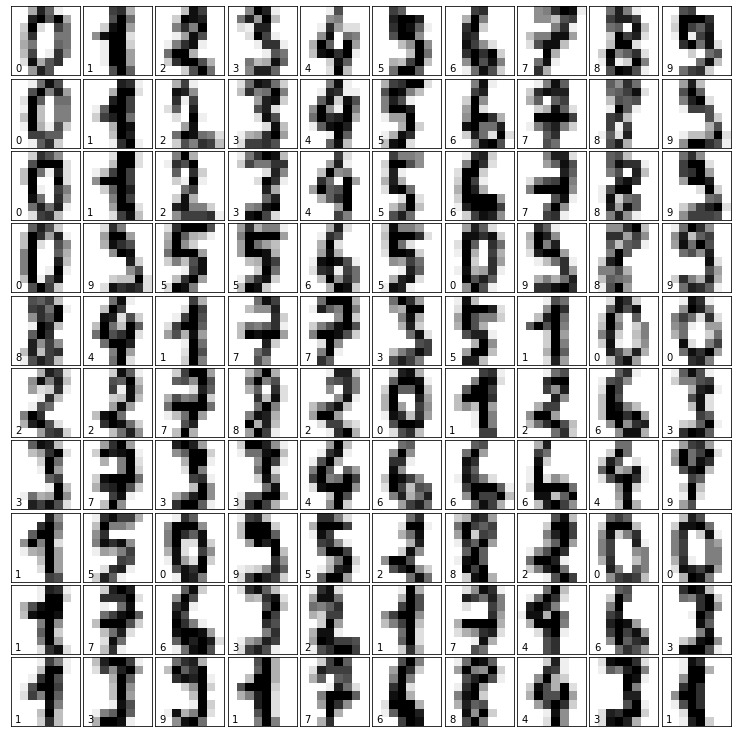

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Plot a projection on the 2 first principal axis
------------------------------------------------



(1797, 2)


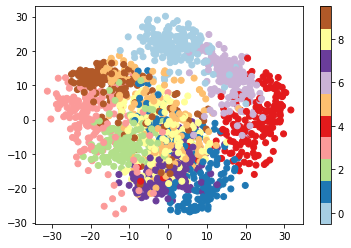

In [4]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
print(proj.shape)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target.astype(int), cmap=plt.get_cmap('Paired', 10), vmin=-0.5, vmax=9.5)
plt.colorbar()

# **Plot principal components**

In [5]:

pca = PCA(n_components=64)

proj = pca.fit_transform(digits.data)

[1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 1.14286697e-30 1.14286697e-30 1.12542605e-30]


<BarContainer object of 64 artists>

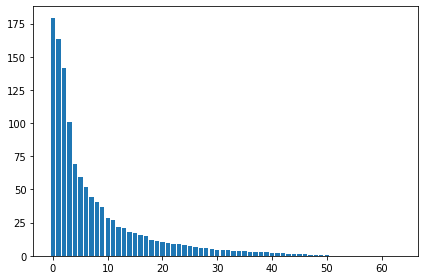

In [6]:

principal = pca.explained_variance_
print(pca.explained_variance_)

fig, ax = plt.subplots(tight_layout=True)
ax.bar( [x for x in range(principal.size)], principal)


Quantify the performance




In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
init = np.random.randint(0,1000)
X_train, X_test, y_train, y_test = train_test_split(pca.fit_transform(digits.data)[:,0:32], digits.target, random_state=init)




## **Classify with Naive Bayes Classifies / Fisher Linear Discriminants**

GaussianNB(priors=None, var_smoothing=1e-09)
Score =  0.9517446176688938


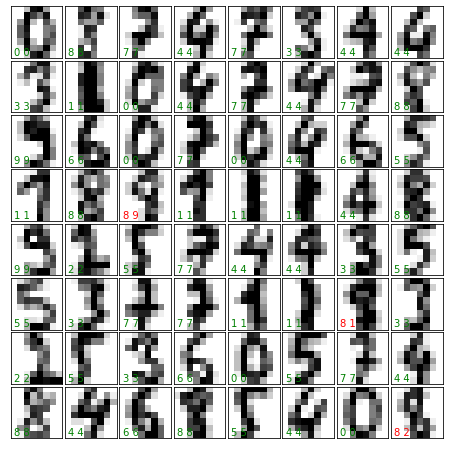

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# train the model
clf = GaussianNB()
#clf = LinearDiscriminantAnalysis()


print(clf.fit(X_train, y_train))
#print(clf.feature_importances_)  

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test


print("Score = ",clf.score(X_train, y_train))

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# split the data into training and validation sets
XP_train, XP_test, yP_train, yP_test = train_test_split(digits.data, digits.target, random_state=init)
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(XP_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='red')

In the plot above first label is the expected (true) digit, second the reconstructed digit


Number of matches

In [9]:
matches = (predicted == expected)
print(matches.sum())

430


The total number of data points



In [10]:
print(len(matches))

450


And now, the ratio of correct predictions



In [11]:
matches.sum() / float(len(matches))

0.9555555555555556

Print the classification report



In [12]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.91      1.00      0.95        53
           2       0.95      1.00      0.98        40
           3       1.00      0.96      0.98        46
           4       0.98      0.98      0.98        56
           5       0.98      0.98      0.98        44
           6       0.97      1.00      0.99        35
           7       0.92      0.98      0.95        50
           8       0.95      0.82      0.88        49
           9       0.89      0.89      0.89        35

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.95       450
weighted avg       0.96      0.96      0.95       450



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [13]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[40  0  0  0  1  0  0  0  0  1]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  2  0]
 [ 0  0  0  0 55  0  0  1  0  0]
 [ 0  0  0  0  0 43  0  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  1  0  0  0  0  0 49  0  0]
 [ 0  3  2  0  0  1  1  0 40  2]
 [ 0  1  0  0  0  0  0  3  0 31]]
